In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Select features and target columns
features = ['pathDomainRatio', 'domainUrlRatio', 'tld', 
            'Entropy_Domain', 'domain_token_count', 'pathurlRatio', 
            'delimeter_Domain', 'SymbolCount_Domain', 'ldl_domain', 
            'avgdomaintokenlen', 'longdomaintokenlen', 'Domain_LongestWordLength', 
            'host_letter_count', 'subDirLen', 'sub-Directory_LongestWordLength']

# Clean the dataset by removing NaNs and infinities in numeric columns only
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

numeric_features = [f for f in features if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

X = df_cleaned[numeric_features + ['tld_encoded']]
y = df_cleaned['binary_label'] = df_cleaned['url_type'].apply(lambda x: 0 if x == 'benign' else 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=df_cleaned['binary_label']
)

# Initialize and fit the Random Forest classifier
rf_classifier = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Classification reports
print("Binary Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("\nBinary Classification Report - Test Data:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Multiclass Classification
malicious_df = df_cleaned[df_cleaned['binary_label'] == 1].copy()
X_multi = malicious_df[numeric_features + ['tld_encoded']]
y_multi = malicious_df['url_type_encoded']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)
rf_multiclass_classifier = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
rf_multiclass_classifier.fit(X_train_multi, y_train_multi)

# Predictions and Evaluations for Multiclass
y_train_pred_multi = rf_multiclass_classifier.predict(X_train_multi)
y_test_pred_multi = rf_multiclass_classifier.predict(X_test_multi)
print("Multiclass Classification Report (Training):")
print(classification_report(y_train_multi, y_train_pred_multi))
print("Multiclass Classification Report (Test):")
print(classification_report(y_test_multi, y_test_pred_multi))

# Accuracy Summary
train_accuracy_bin = accuracy_score(y_train, y_train_pred)
test_accuracy_bin = accuracy_score(y_test, y_test_pred)
train_accuracy_multi = accuracy_score(y_train_multi, y_train_pred_multi)
test_accuracy_multi = accuracy_score(y_test_multi, y_test_pred_multi)

print(f"Binary Classification - Train Accuracy: {train_accuracy_bin:.4f}")
print(f"Binary Classification - Test Accuracy: {test_accuracy_bin:.4f}")
print(f"Multiclass Classification - Train Accuracy: {train_accuracy_multi:.4f}")
print(f"Multiclass Classification - Test Accuracy: {test_accuracy_multi:.4f}")


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silenc

Binary Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    299672
           1       0.94      0.85      0.89    156161

    accuracy                           0.93    455833
   macro avg       0.93      0.91      0.92    455833
weighted avg       0.93      0.93      0.93    455833

Training Accuracy: 0.930507444612391

Binary Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    128431
           1       0.94      0.84      0.89     66927

    accuracy                           0.93    195358
   macro avg       0.93      0.91      0.92    195358
weighted avg       0.93      0.93      0.93    195358

Test Accuracy: 0.9266014189334453


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silenc

Multiclass Classification Report (Training):
              precision    recall  f1-score   support

           1       0.98      1.00      0.99     67520
           2       0.98      0.96      0.97     22764
           3       0.99      0.97      0.98     65877

    accuracy                           0.98    156161
   macro avg       0.98      0.98      0.98    156161
weighted avg       0.98      0.98      0.98    156161

Multiclass Classification Report (Test):
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     28937
           2       0.96      0.94      0.95      9756
           3       0.98      0.94      0.96     28234

    accuracy                           0.96     66927
   macro avg       0.96      0.96      0.96     66927
weighted avg       0.96      0.96      0.96     66927

Binary Classification - Train Accuracy: 0.9305
Binary Classification - Test Accuracy: 0.9266
Multiclass Classification - Train Accuracy: 0.9812
Multicla

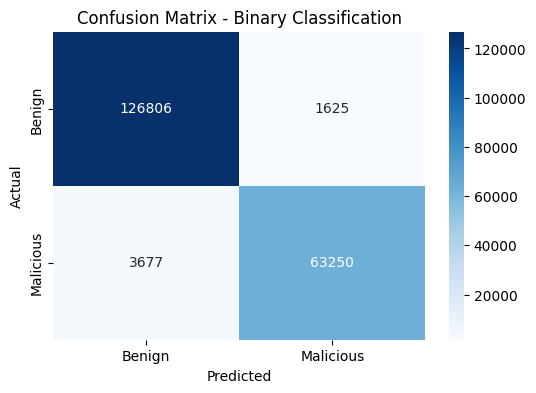

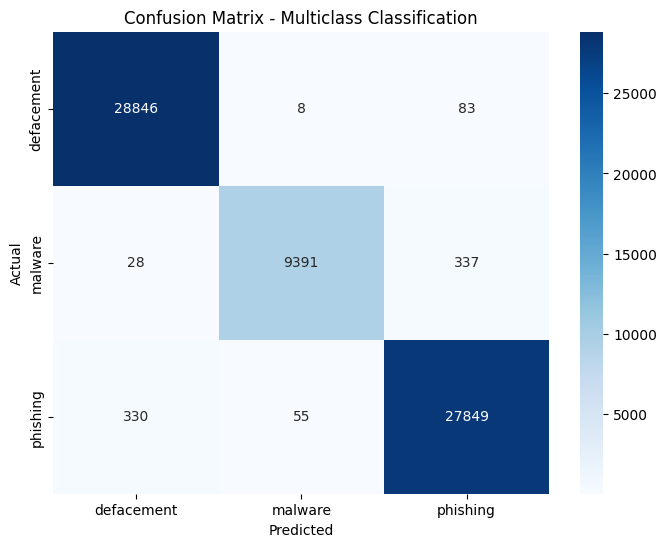

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot the confusion matrix for binary classification
plt.figure(figsize=(6, 4))
cm_bin = confusion_matrix(y_test_bin, y_test_pred_bin)
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Confusion Matrix - Binary Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for multiclass classification
plt.figure(figsize=(8, 6))
cm_multi = confusion_matrix(y_test_multi, y_test_pred_multi)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Multiclass Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Select features and target columns
features = ['pathDomainRatio', 'domainUrlRatio', 'tld', 'Entropy_Domain', 'domain_token_count', 
            'pathurlRatio', 'delimeter_Domain', 'SymbolCount_Domain', 'ldl_domain', 'avgdomaintokenlen', 
            'longdomaintokenlen', 'Domain_LongestWordLength', 'host_letter_count', 'subDirLen', 
            'sub-Directory_LongestWordLength','avgpathtokenlen','spcharUrl','SymbolCount_URL',
            'Directory_LetterCount','ldl_path','delimeter_Count','NumberofDotsinURL','Path_LongestWordLength',
            'LongestPathTokenLength','CharacterContinuityRate','argDomanRatio','argPathRatio',
            'Entropy_Filename','Entropy_URL','path_token_count']

# Clean the dataset by removing NaNs and infinities in numeric columns only
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

numeric_features = [f for f in features if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])
X = df_cleaned[numeric_features + ['tld_encoded']]
y = df_cleaned['binary_label'] = df_cleaned['url_type'].apply(lambda x: 0 if x == 'benign' else 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=df_cleaned['binary_label']
)

# Initialize and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Classification reports
print("Binary Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("\nBinary Classification Report - Test Data:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Multiclass Classification
malicious_df = df_cleaned[df_cleaned['binary_label'] == 1].copy()
X_multi = malicious_df[numeric_features + ['tld_encoded']]
y_multi = malicious_df['url_type_encoded']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.4, random_state=42, stratify=y_multi
)
rf_multiclass_classifier = RandomForestClassifier(random_state=42)
rf_multiclass_classifier.fit(X_train_multi, y_train_multi)

# Predictions and Evaluations for Multiclass
y_train_pred_multi = rf_multiclass_classifier.predict(X_train_multi)
y_test_pred_multi = rf_multiclass_classifier.predict(X_test_multi)
print("Multiclass Classification Report (Training):")
print(classification_report(y_train_multi, y_train_pred_multi))
print("Multiclass Classification Report (Test):")
print(classification_report(y_test_multi, y_test_pred_multi))

# Accuracy Summary
train_accuracy_bin = accuracy_score(y_train, y_train_pred)
test_accuracy_bin = accuracy_score(y_test, y_test_pred)
train_accuracy_multi = accuracy_score(y_train_multi, y_train_pred_multi)
test_accuracy_multi = accuracy_score(y_test_multi, y_test_pred_multi)

print(f"Binary Classification - Train Accuracy: {train_accuracy_bin:.4f}")
print(f"Binary Classification - Test Accuracy: {test_accuracy_bin:.4f}")
print(f"Multiclass Classification - Train Accuracy: {train_accuracy_multi:.4f}")
print(f"Multiclass Classification - Test Accuracy: {test_accuracy_multi:.4f}")


Binary Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299672
           1       1.00      1.00      1.00    156161

    accuracy                           1.00    455833
   macro avg       1.00      1.00      1.00    455833
weighted avg       1.00      1.00      1.00    455833

Training Accuracy: 0.9986903098283801

Binary Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128431
           1       0.97      0.95      0.96     66927

    accuracy                           0.97    195358
   macro avg       0.97      0.97      0.97    195358
weighted avg       0.97      0.97      0.97    195358

Test Accuracy: 0.9718977467009285


KeyboardInterrupt: 